# Week 8 assignment: NLP on social media data

Take our social media we collected last week and:

- extract the sentiment scores of the titles of the posts
    - you can use the keyword method, Python packages, or other methods to extract the sentiment scores
- plot a histogram of the sentiment scores
- look at descriptive statistics (mean, median, standard deviation) of the sentiment scores
- examine the text for some of the highest and lowest sentiment scores
- write a short analysis of the results and our process, as well as propose one idea for something we could use this data for

Optional advanced challenges:
- Compare different sentiment analysis methods (e.g. textblob and VADER). Does one seem to work better than another?
- Get the sentiments of the comments for each post. We can do a lot with this, such as:
    - look at the average sentiment for each post and compare it with the sentiment of the title and/or text
    - look at the distribution of sentiments for each post and find the posts with the widest range of sentiments (controversial posts)
- Examine the subjectivity of our data (e.g. using textblob)
- Use topic modeling on the posts
    - you can also add in the comments to the topic model
- Look at the most frequent words for positive and negative sentiment posts

Note: There is no assignment solution file for this week.

In [38]:
# !pip install textblob

In [40]:
# !pip install vadersentiment

In [11]:
import sqlite3
import pandas as pd

con = sqlite3.connect('data/co_reddit.sqlite')
df = pd.read_sql_query('SELECT * from posts;', con)
con.close()
df

,title,link,author,n_comments,score,text
0,Security hold on BTC for over a month,/r/Gemini/comments/1j3hm24/security_hold_on_bt...,av8er1978,1,1,"I've emailed supp multiple times, I've sent th..."
1,Staking on Gemini,/r/Gemini/comments/1j3geo5/staking_on_gemini/,FrankieBaggaDonuts,0,1,Anyone know if we'll be getting staking on Gem...
2,Any promo codes?,/r/Gemini/comments/1j3970s/any_promo_codes/,Lucky-Honeydew4289,6,0,"Hello, does anyone have any promo code for new..."
3,Ask r/Gemini - Monthly Discussion Thread March...,/r/Gemini/comments/1j339d9/ask_rgemini_monthly...,Gemini_Gianna,0,0,Welcome to r/Gemini \- Community Guidelines an...
4,How long after new login location can I send c...,/r/Gemini/comments/1j2vxl2/how_long_after_new_...,ZeroGirlsSB,0,0,"Not really and urgent question, just curious"
...,...,...,...,...,...,...
887,Are we receiving the interest for the last cou...,/r/Gemini/comments/1cuyoib/are_we_receiving_th...,Remarkable3897,48,9,
888,Gemini update,/r/Gemini/comments/1cumf0p/gemini_update/,Pizzaholic-,67,71,We did it everyone congrats!!!
889,Memorandum of Decision,/r/Gemini/comments/1cujxtu/memorandum_of_decis...,Previous_Pension_309,9,11,More literature of how our funds have come tog...
890,Donut update 5/17/24,/r/Gemini/comments/1cuffcg/donut_update_51724/,No_Spirit_3173,44,5,"Confirmation of the Plan remains under review,..."


# Keyword Sentiment

We have to load a dictionary of words and sentiment values using this keyword sentiment analysis technique.

In [12]:
sentiment_df = pd.read_csv('data/AFINN-en-165.txt', sep='\t', names=['word', 'score'], index_col='word')

In [13]:
sentiment_df

,score
word,
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
...,...
yucky,-2
yummy,3
zealot,-2


In [14]:
sentiment_dict = sentiment_df.to_dict()['score']
sentiment_dict

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'aborted': -1,
 'aborts': -1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusing': -3,
 'abusive': -3,
 'accept': 1,
 'acceptable': 1,
 'acceptance': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accessible': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'acclaim': 2,
 'acclaimed': 2,
 'accolade': 2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accomplishment': 2,
 'accomplishments': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimo

In [15]:
import numpy as np

title_sentiments = []
for title in df['title']:
    words = title.lower().split()
    this_titles_sentiments = []
    for w in words:
        if w in sentiment_dict.keys():
            this_titles_sentiments.append(sentiment_dict[w])
        else:
            this_titles_sentiments.append(0)
            
    
    title_sentiments.append(np.mean(this_titles_sentiments))

In [16]:
df['keyword_sentiment'] = title_sentiments

In [17]:
df['keyword_sentiment'].mean()

-0.03000184484961815

In [18]:
titles = df['title']

In [19]:
df.sort_values(by='keyword_sentiment')[['title', 'keyword_sentiment']]

,title,keyword_sentiment
605,Scam,-2.0
490,WTF Gemini,-2.0
335,Worst company,-1.5
5,Worst Experience,-1.5
270,Luna Losses,-1.5
...,...,...
60,Need help,1.0
499,GEMINI HELP,1.0
818,Panic… then joy,1.0
50,Help,2.0


In [20]:
# full titles of the bottom 12 sentiments
df.sort_values(by='keyword_sentiment')['title'].to_list()[:12]

['Scam',
 'WTF Gemini',
 'Worst company',
 'Worst Experience',
 'Luna Losses',
 'Eth withdrawal being denied',
 'Another fail ',
 'Lost authy access',
 'I cried ',
 'seriously unprofessional',
 'Donut withdrawal available',
 'wire problem']

In [21]:
# full titles of the top 12 sentiments
df.sort_values(by='keyword_sentiment', ascending=False)['title'].to_list()[:12]

['Help',
 'HELP',
 'Please help Gemini',
 'Panic… then joy',
 'GEMINI HELP',
 'Account Help',
 'Need help',
 'Gemini help',
 'Wonderful Experience with Customer Service',
 'Thank You Gemini / Relieved',
 'Happy Lunar New Year!',
 'All funds back… woohoo']

In [23]:
from textblob import TextBlob

tb = TextBlob("Snow capped mountains are very beautiful")
tb.sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [24]:
def get_tb_sentiment(text):
    tb = TextBlob(text)
    return tb.sentiment[0]

df['tb_sentiment'] = df['title'].apply(get_tb_sentiment)

<Axes: ylabel='Frequency'>

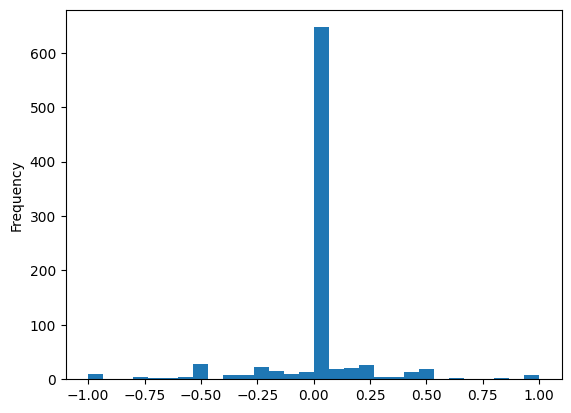

In [36]:
df['tb_sentiment'].plot.hist(bins=30)

In [28]:
df['tb_sentiment'].mean()

-0.007237127440322507

We have install vadersentiment before importing it.

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores("snow capped mountains are very beautiful")

{'neg': 0.467, 'neu': 0.533, 'pos': 0.0, 'compound': -0.5423}

In [32]:
analyzer.polarity_scores("snow capped mountains are very beautiful")['compound']

0.6361

In [33]:
#apply vader to the whole df
df['compound'] = [analyzer.polarity_scores(i)['compound'] for i in df['title']]

In [34]:
df['compound'].mean()

0.04432230941704036

<Axes: ylabel='Frequency'>

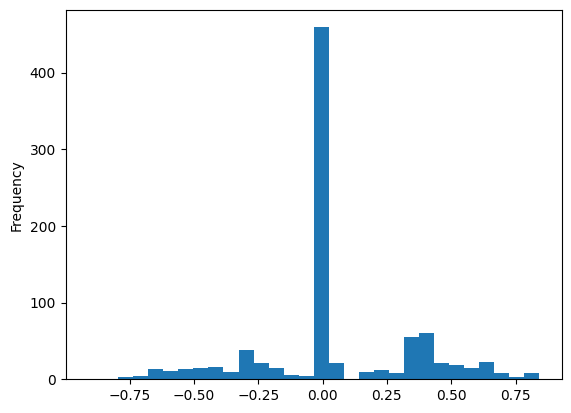

In [35]:
df['compound'].plot.hist(bins=30)

# Summary

Write a short summary of what you did and the results here.


We install necessary libraries like textblob and vadersentiment to analyze sentiment.

Loading Reddit Data

- We connect to an SQLite database (co_reddit.sqlite) and load posts into a Pandas DataFrame (df).
 Once the data is retrieved, we close the connection.

Keyword-Based Sentiment Analysis

- We load a sentiment dictionary (AFINN-en-165.txt), which contains words paired with sentiment scores.
- We store it as a Pandas DataFrame and then convert it into a dictionary (sentiment_dict) for quick lookups.

Processing Post Titles for Sentiment

- We likely apply our sentiment dictionary to analyze sentiment in post titles.
- We use NumPy and Pandas to process and score the data.

Visualizing Sentiment Scores

- histograms display the sentiment distribution.